In [3]:
install.packages('neuralnet', repos = "http://cran.us.r-project.org")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [111]:
install.packages('GGally', repos = "http://cran.us.r-project.org")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [110]:
install.packages('tidyverse', repos = "http://cran.us.r-project.org")

also installing the dependencies ‘callr’, ‘clipr’, ‘dbplyr’, ‘reprex’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [112]:
install.packages('car', repos = "http://cran.us.r-project.org")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(GGally) #for ggpairs, which can use ggplot functions
library(tidyverse)
library(neuralnet)

Loading required package: ggplot2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.1     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.3.0
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘neuralnet’

The following object is masked from ‘package:dplyr’:

    compute



In [4]:
sensiti_met_data <- read.table("../data/sensitivity_met_data.txt",header=T) %>% na.omit()

In [5]:
str(sensiti_met_data)

'data.frame':	1775 obs. of  10 variables:
 $ X           : int  14755 14756 14757 14758 14759 14760 14761 14762 14763 14764 ...
 $ date        : Factor w/ 1776 levels "2017-08-03 00:00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Rl_downwell : num  324 326 328 329 326 ...
 $ AT_mbar     : num  873 873 873 873 872 ...
 $ Rs_downwell : num  -5.6 -5.28 -5.02 -5.3 -5.78 ...
 $ rH          : num  81.3 81.3 81.9 82.2 80.6 ...
 $ T_b_1477    : num  5.57 5.62 5.57 5.69 5.77 ...
 $ D_g_1477    : num  112 116 132 126 112 ...
 $ F_1_s_g_1477: num  1.731 0.945 0.955 1.474 1.928 ...
 $ Rnet        : num  -15.4 -14.9 -13.2 -11.5 -14.1 ...
 - attr(*, "na.action")=Class 'omit'  Named int 1629
  .. ..- attr(*, "names")= chr "1629"


In [6]:
summary(sensiti_met_data)

       X                          date       Rl_downwell       AT_mbar     
 Min.   :14755   2017-08-03 00:00:00:   1   Min.   :234.2   Min.   :857.2  
 1st Qu.:15198   2017-08-03 00:30:00:   1   1st Qu.:295.9   1st Qu.:870.2  
 Median :15642   2017-08-03 01:00:00:   1   Median :325.2   Median :874.6  
 Mean   :15642   2017-08-03 01:30:00:   1   Mean   :314.1   Mean   :873.8  
 3rd Qu.:16086   2017-08-03 02:00:00:   1   3rd Qu.:337.0   3rd Qu.:878.3  
 Max.   :16530   2017-08-03 02:30:00:   1   Max.   :357.9   Max.   :882.3  
                 (Other)            :1769                                  
  Rs_downwell            rH           T_b_1477          D_g_1477     
 Min.   :-10.536   Min.   :36.73   Min.   :-0.3046   Min.   : 31.79  
 1st Qu.: -6.133   1st Qu.:71.44   1st Qu.: 5.2602   1st Qu.:128.66  
 Median : 29.409   Median :80.10   Median : 6.7863   Median :209.17  
 Mean   :130.600   Mean   :77.10   Mean   : 6.5791   Mean   :208.70  
 3rd Qu.:209.278   3rd Qu.:84.98   3rd Qu.

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some



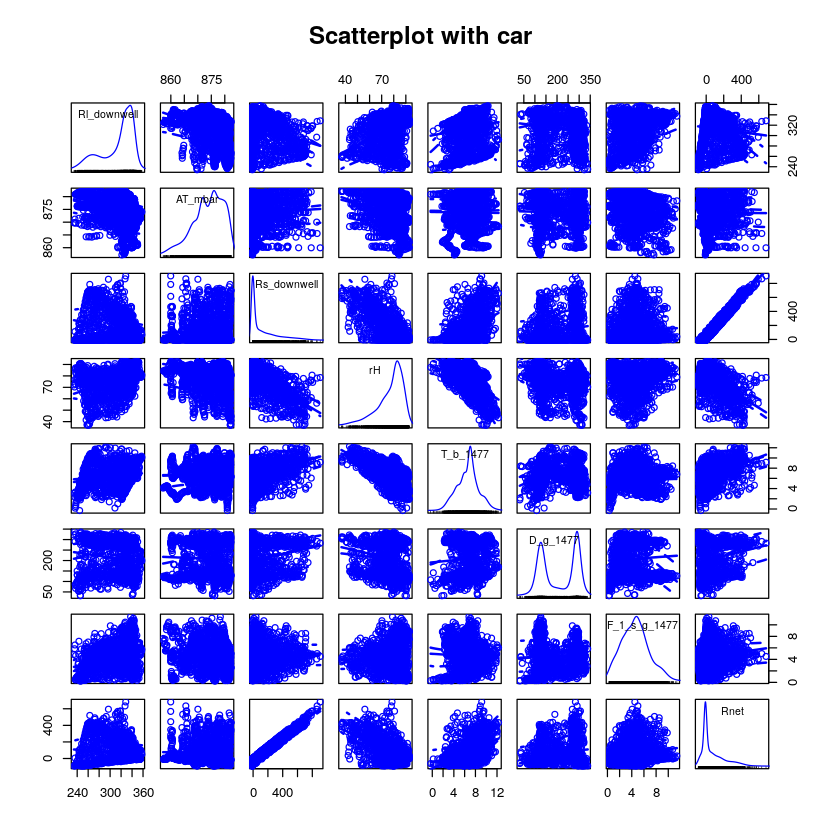

In [7]:
library(car)
scatterplotMatrix(~Rl_downwell+AT_mbar+Rs_downwell+rH+T_b_1477+D_g_1477+F_1_s_g_1477+Rnet, data=sensiti_met_data,
   main="Scatterplot with car")

In [113]:
#? ggpairs

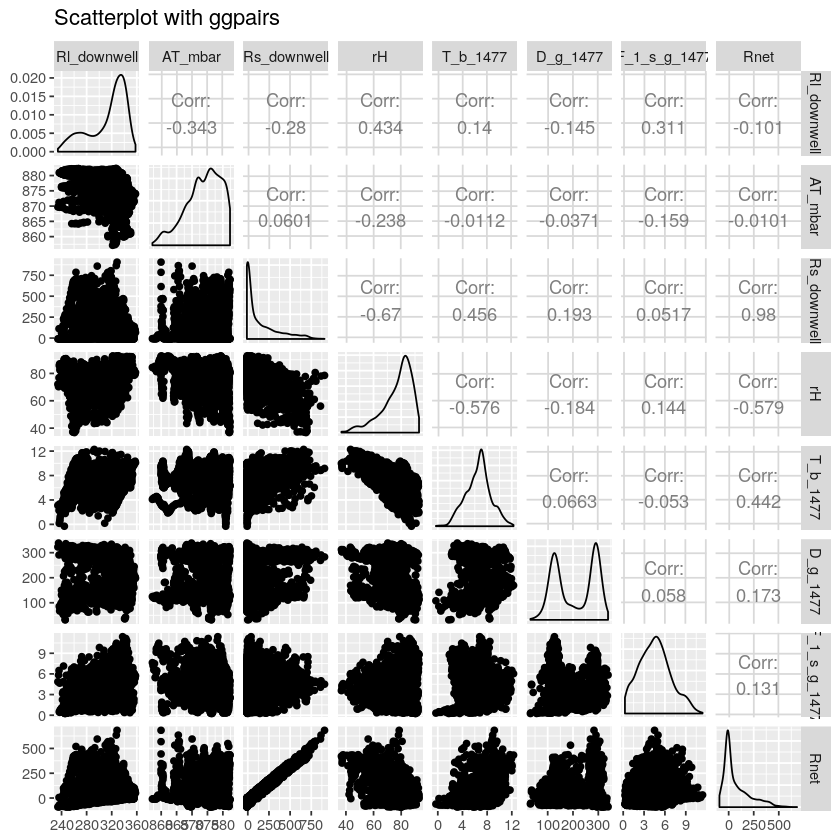

In [8]:
ggpairs(sensiti_met_data[c(3,4,5,6,7,8,9,10)],title="Scatterplot with ggpairs")

In [7]:
# Scale the Data from 0 to 1:
scale01 <- function(x){
  (x - min(x)) / (max(x) - min(x))
}

sensiti_met_d <- sensiti_met_data[c(3,4,5,6,7,8,9,10)] %>%  mutate_all(scale01)

# Split into test and train sets
set.seed(12345)
#size is the proportion to training
sensiti_Data_Train <- sample_frac(tbl = sensiti_met_d, replace = FALSE, size = 0.80)  
sensiti_Data_Test <- anti_join(sensiti_met_d, sensiti_Data_Train)

Joining, by = c("Rl_downwell", "AT_mbar", "Rs_downwell", "rH", "T_b_1477", "D_g_1477", "F_1_s_g_1477", "Rnet")


In [8]:
set.seed(12321)
#1-hidden layer ANN with 1 neuron, the simplest of all neural networks:
sensiti_NN1 <- neuralnet(Rnet~Rl_downwell+AT_mbar+Rs_downwell+rH+T_b_1477+D_g_1477+F_1_s_g_1477,data=sensiti_Data_Train)

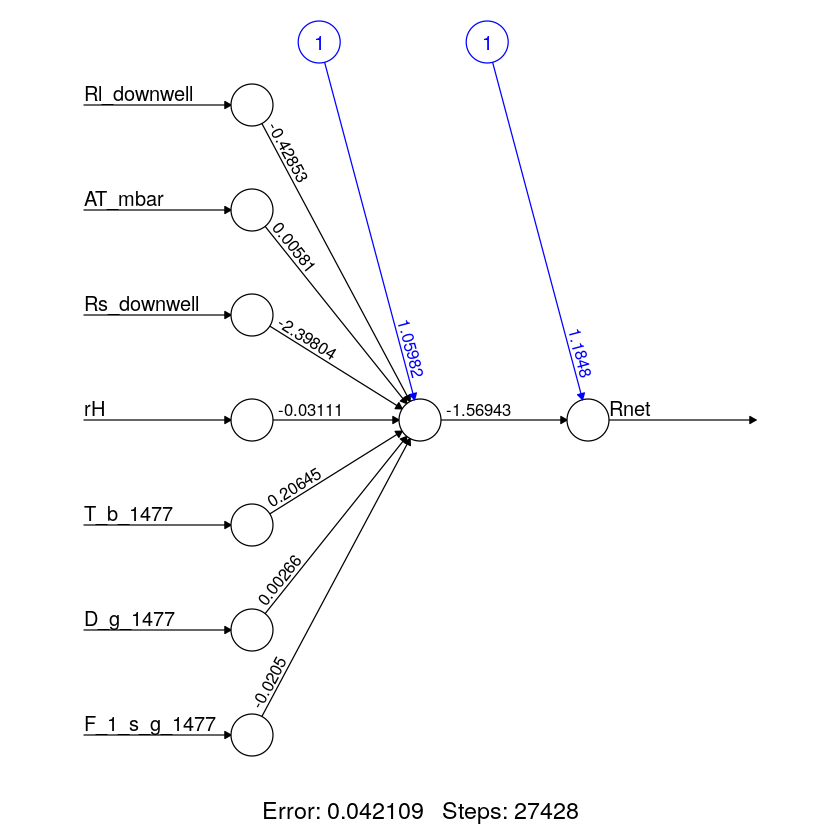

In [9]:
plot(sensiti_NN1, rep = 'best')
# weights learned by the sensiti_NN1 neural network, and displays the number of iterations before convergence, 
# as well as the SSE of the training data set. 

In [146]:
? par

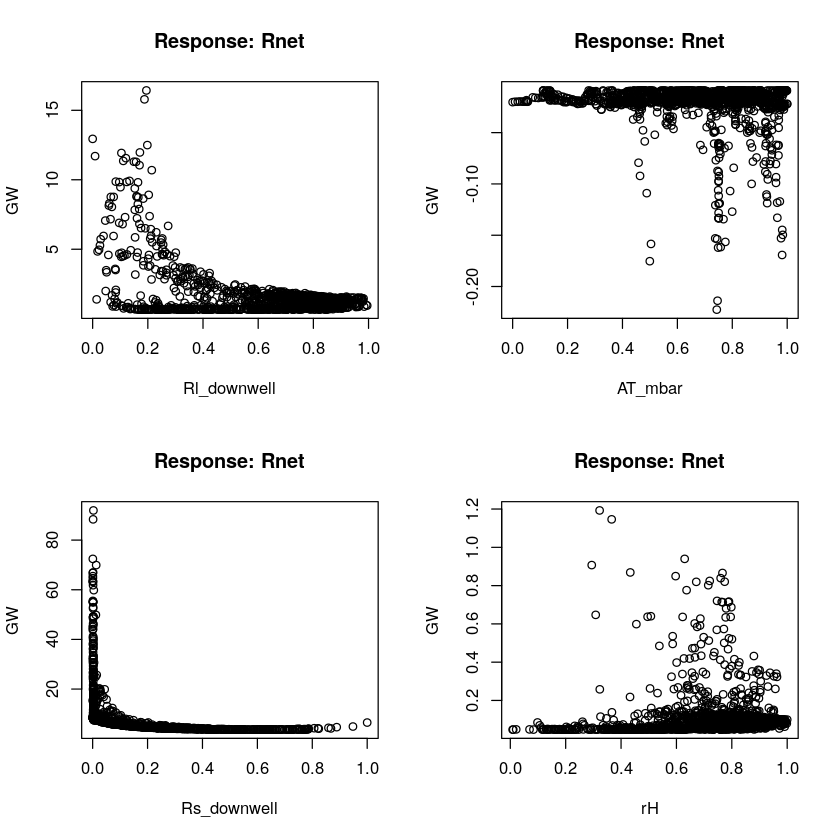

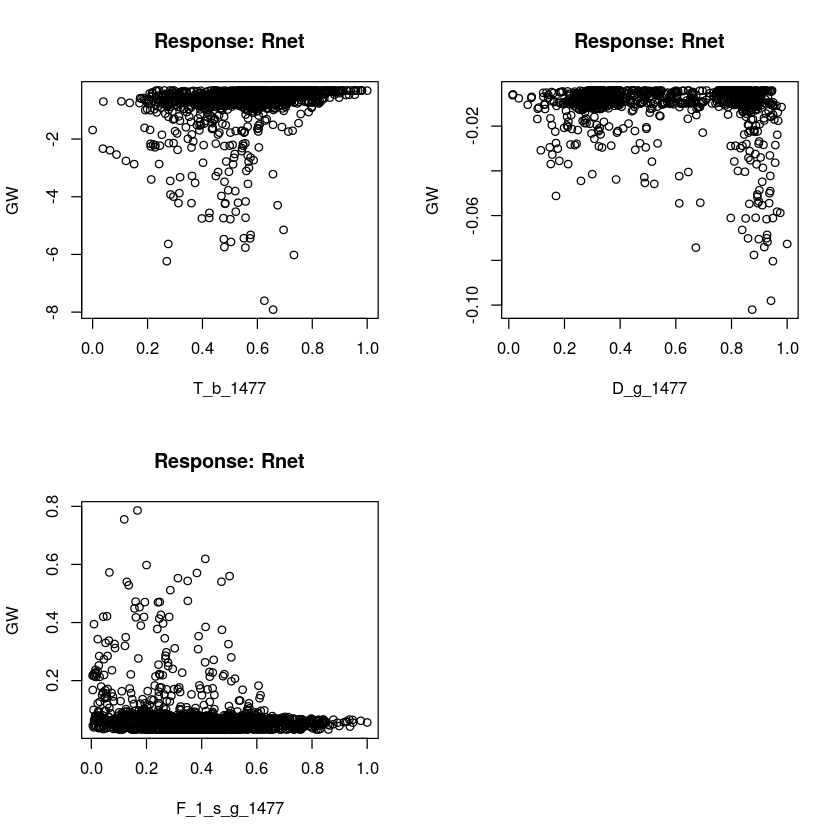

In [145]:
par(mfrow=c(2,2))  
# visualize the generalized weights:
gwplot(sensiti_NN1,selected.covariate="Rl_downwell")
gwplot(sensiti_NN1,selected.covariate="AT_mbar")
gwplot(sensiti_NN1,selected.covariate="Rs_downwell")
gwplot(sensiti_NN1,selected.covariate="rH")
gwplot(sensiti_NN1,selected.covariate="T_b_1477")
gwplot(sensiti_NN1,selected.covariate="D_g_1477")
gwplot(sensiti_NN1,selected.covariate="F_1_s_g_1477")

In [10]:
Test_NN1_Output <- compute(sensiti_NN1, sensiti_Data_Test[, 1:7])$net.result
NN1_Test_SSE <- sum((Test_NN1_Output - sensiti_Data_Test[, 8])^2)/2
NN1_Test_SSE

[1] 0.01232044809

In [11]:
# cor to calculate the correlation between the two numeric vectors:
cor(Test_NN1_Output,sensiti_Data_Test[, 8])

0.99899765


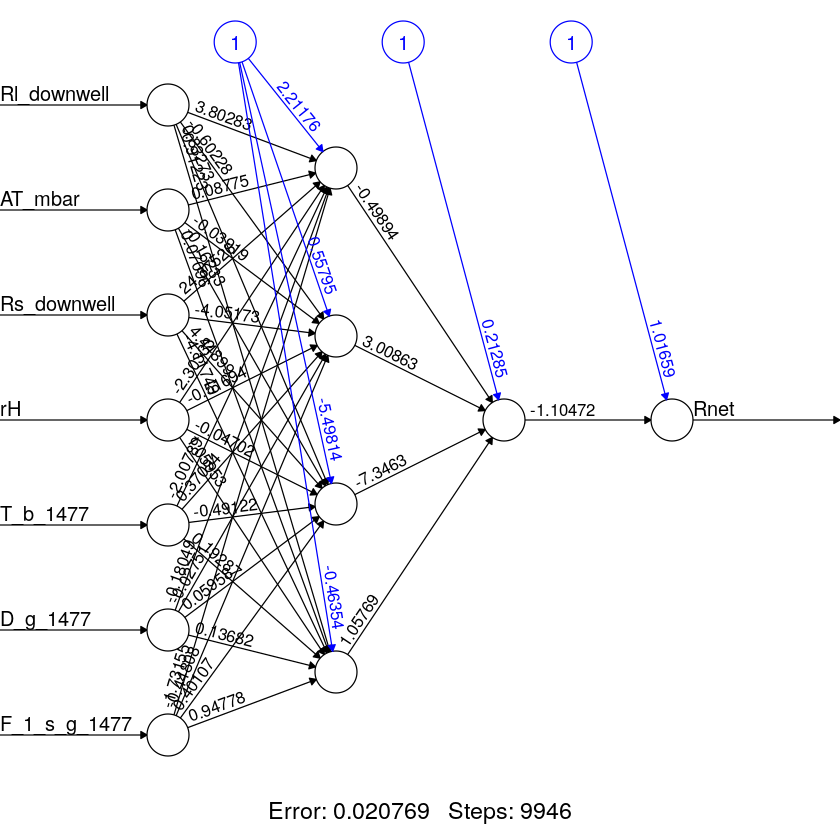

In [12]:
# 2-Hidden Layers, Layer-1 4-neurons, Layer-2, 1-neuron
# function
set.seed(12321)
sensiti_NN2 <- neuralnet(Rnet~Rl_downwell+AT_mbar+Rs_downwell+rH+T_b_1477+D_g_1477+F_1_s_g_1477,data=sensiti_Data_Train,
                        hidden = c(4, 1))

## Test Error
Test_NN2_Output <- compute(sensiti_NN2, sensiti_Data_Test[, 1:7])$net.result
NN2_Test_SSE <- sum((Test_NN2_Output - sensiti_Data_Test[, 8])^2)/2
NN2_Test_SSE
plot(sensiti_NN2, rep = 'best')

In [13]:
# cor to calculate the correlation between the two numeric vectors:
cor(Test_NN2_Output,sensiti_Data_Test[, 8])

0.9995633968


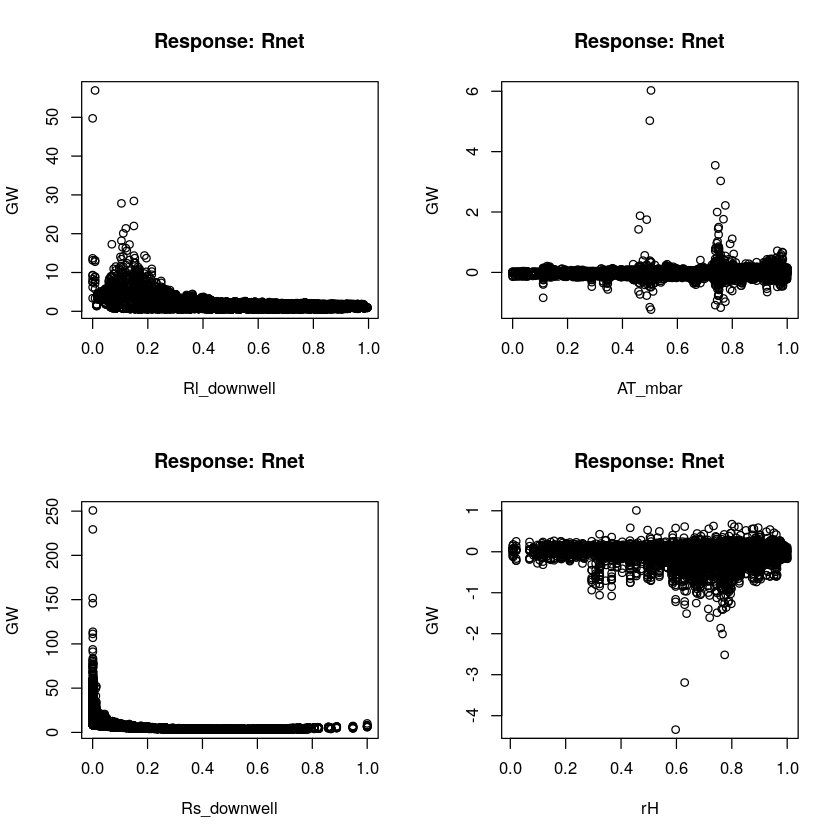

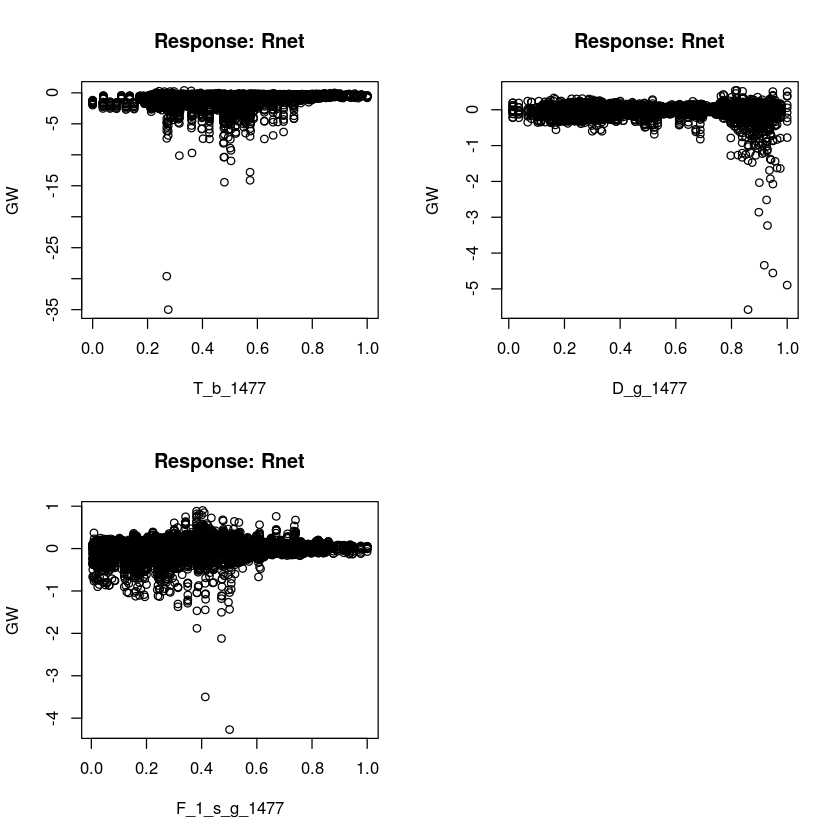

In [148]:
par(mfrow=c(2,2))
gwplot(sensiti_NN2,selected.covariate="Rl_downwell")
gwplot(sensiti_NN2,selected.covariate="AT_mbar")
gwplot(sensiti_NN2,selected.covariate="Rs_downwell")
gwplot(sensiti_NN2,selected.covariate="rH")
gwplot(sensiti_NN2,selected.covariate="T_b_1477")
gwplot(sensiti_NN2,selected.covariate="D_g_1477")
gwplot(sensiti_NN2,selected.covariate="F_1_s_g_1477")

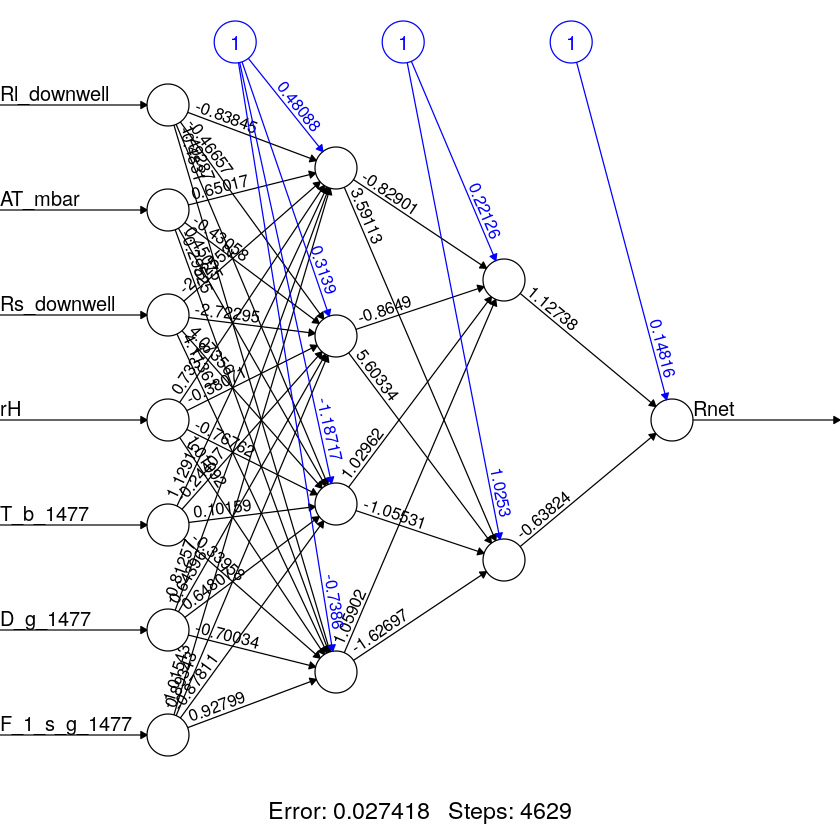

In [14]:
# 2-Hidden Layers, Layer-1 4-neurons, Layer-2 2-neurons, 1-neuron
# function
set.seed(12321)
sensiti_NN3 <- neuralnet(Rnet~Rl_downwell+AT_mbar+Rs_downwell+rH+T_b_1477+D_g_1477+F_1_s_g_1477,data=sensiti_Data_Train,
                        hidden = c(4, 2))

## Test Error
Test_NN3_Output <- compute(sensiti_NN3, sensiti_Data_Test[, 1:7])$net.result
NN3_Test_SSE <- sum((Test_NN3_Output - sensiti_Data_Test[, 8])^2)/2

plot(sensiti_NN3, rep = 'best')

In [15]:
# cor to calculate the correlation between the two numeric vectors:
cor(Test_NN3_Output,sensiti_Data_Test[, 8])

0.9993945818


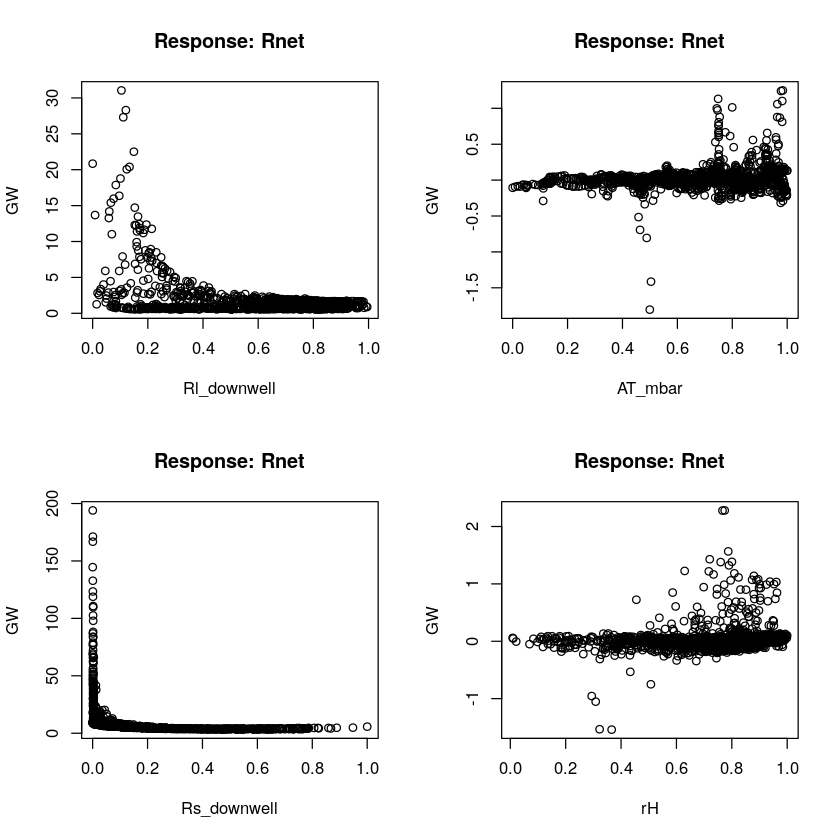

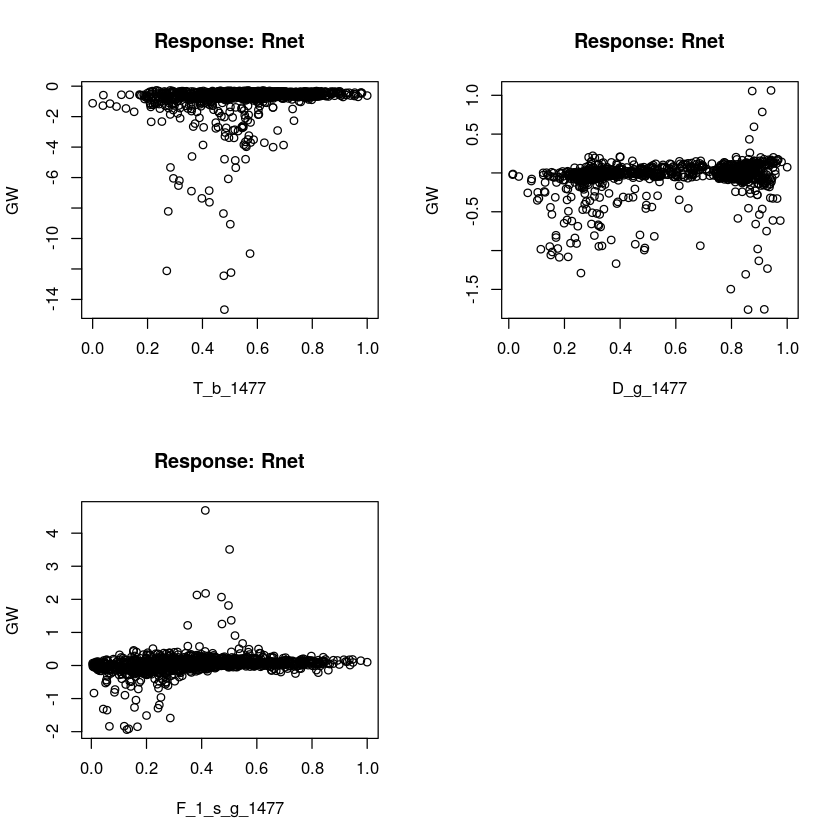

In [147]:
par(mfrow=c(2,2))
gwplot(sensiti_NN3,selected.covariate="Rl_downwell")
gwplot(sensiti_NN3,selected.covariate="AT_mbar")
gwplot(sensiti_NN3,selected.covariate="Rs_downwell")
gwplot(sensiti_NN3,selected.covariate="rH")
gwplot(sensiti_NN3,selected.covariate="T_b_1477")
gwplot(sensiti_NN3,selected.covariate="D_g_1477")
gwplot(sensiti_NN3,selected.covariate="F_1_s_g_1477")

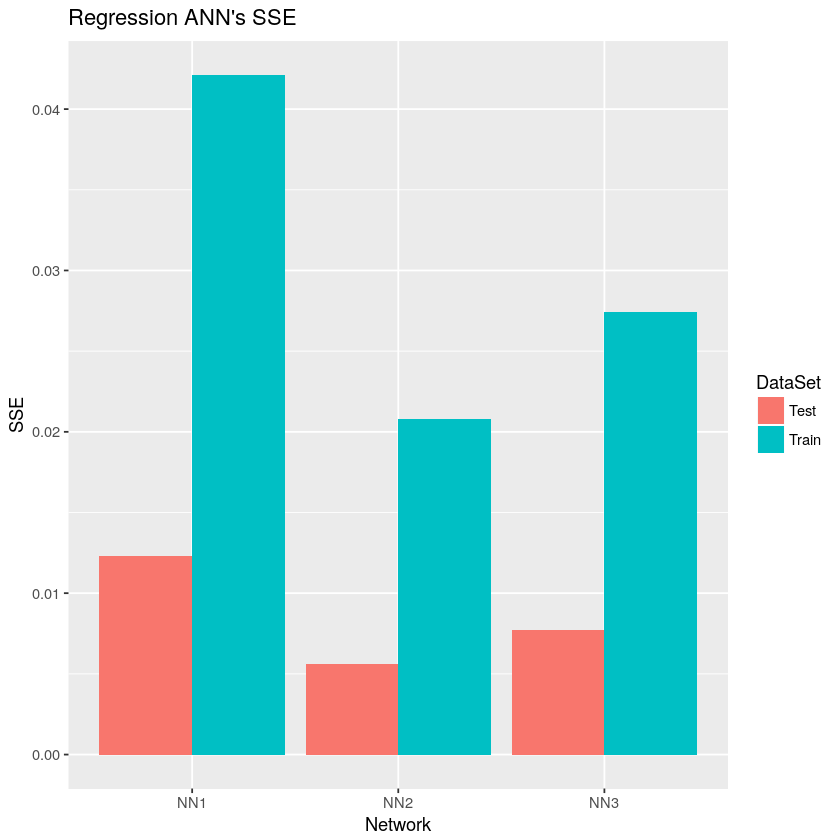

In [102]:
# training error
NN1_Train_SSE <- sensiti_NN1$result.matrix[1]
NN2_Train_SSE <- sensiti_NN2$result.matrix[1]
NN3_Train_SSE <- sensiti_NN3$result.matrix[1]
# Bar plot of results
Regression_NN_Errors <- tibble(Network = rep(c("NN1", "NN2", "NN3"), each = 2), 
                               DataSet = rep(c("Train", "Test"), time = 3), 
                               SSE = c(NN1_Train_SSE, NN1_Test_SSE, 
                                       NN2_Train_SSE, NN2_Test_SSE, 
                                       NN3_Train_SSE, NN3_Test_SSE))
Regression_NN_Errors %>% ggplot(aes(Network, SSE, fill = DataSet)) + 
  geom_col(position = "dodge") + 
  ggtitle("Regression ANN's SSE")

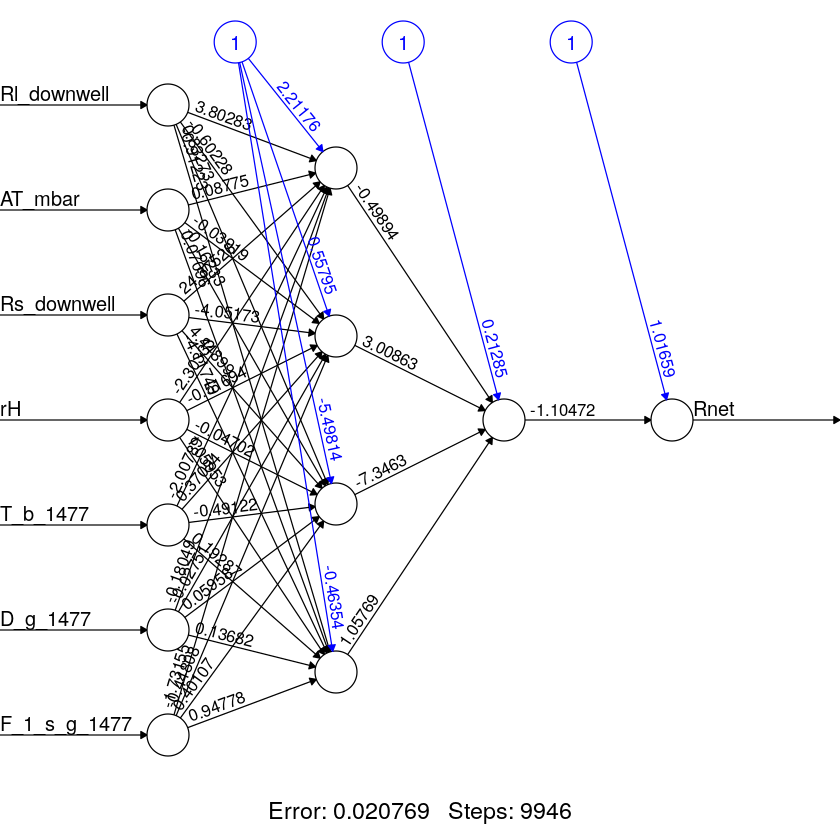

In [106]:
set.seed(12321)
# to do regression linear.output=TRUE
# rep is the repeating the neural network reusing the weights as initial weights
sensiti_NN2 <- neuralnet(Rnet~Rl_downwell+AT_mbar+Rs_downwell+rH+T_b_1477+D_g_1477+F_1_s_g_1477,data=sensiti_Data_Train,
                        hidden = c(4, 1), rep = 10, linear.output=TRUE)
## Test Error
Test_NN2_Output <- compute(sensiti_NN2, sensiti_Data_Test[, 1:7])$net.result
NN2_Test_SSE <- sum((Test_NN2_Output - sensiti_Data_Test[, 8])^2)/2

plot(sensiti_NN2, rep = "best")

## Generalised linear model regression
Now in order to compare with the results of the neural network, we can try a generalised linear model to perform regression. 

In [131]:
#generalised linear model
sensiti_met_d <- sensiti_met_data[c(3,4,5,6,7,8,9,10)] # %>%  mutate_all(scale01)

# Split into test and train sets
set.seed(12345)
#size is the proportion to training
sensiti_Data_Train_uns <- sample_frac(tbl = sensiti_met_d, replace = FALSE, size = 0.80)  
sensiti_Data_Test_uns <- anti_join(sensiti_met_d, sensiti_Data_Train_uns)


lm.fit <- glm(Rnet~., data=sensiti_Data_Train_uns)
summary(lm.fit)
pr.lm <- predict(lm.fit,sensiti_Data_Test_uns)
MSE.lm <- sum((pr.lm - sensiti_Data_Test_uns$Rnet)^2)/nrow(sensiti_Data_Test_uns)
# mean squared error (MSE) as a measure of how much our predictions are far away from the real data:
paste("MSE.lm: ", round(MSE.lm, 6))

Joining, by = c("Rl_downwell", "AT_mbar", "Rs_downwell", "rH", "T_b_1477", "D_g_1477", "F_1_s_g_1477", "Rnet")



Call:
glm(formula = Rnet ~ ., data = sensiti_Data_Train_uns)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-35.265323   -2.983096   -0.177410    2.736188   27.362151  

Coefficients:
                    Estimate      Std. Error   t value               Pr(>|t|)
(Intercept)  -238.1843874667   25.7752592249  -9.24081 < 0.000000000000000222
Rl_downwell     0.8956917252    0.0070294879 127.41920 < 0.000000000000000222
AT_mbar        -0.0606528816    0.0284654483  -2.13075               0.033282
Rs_downwell     0.7469237601    0.0011048305 676.05282 < 0.000000000000000222
rH              0.1564544611    0.0243804891   6.41720       0.00000000018902
T_b_1477       -4.4118713938    0.1086297996 -40.61382 < 0.000000000000000222
D_g_1477        0.0005295169    0.0019019919   0.27840               0.780745
F_1_s_g_1477    0.4174691901    0.0709098709   5.88732       0.00000000489712
                
(Intercept)  ***
Rl_downwell  ***
AT_mbar      *  
Rs_downwe

[1] "MSE.lm:  32.506492"

In [129]:
pr.nn <- compute(sensiti_NN2, sensiti_Data_Test[, 1:7])
## Test Error
#Test_NN2_Output <- compute(sensiti_NN2, sensiti_Data_Test[, 1:7])$net.result
#NN2_Test_SSE <- sum((Test_NN2_Output - sensiti_Data_Test[, 8])^2)/2

pr.nn_ <- pr.nn$net.result*(max(sensiti_met_data$Rnet)-min(sensiti_met_data$Rnet))+min(sensiti_met_data$Rnet)
test.r <- (sensiti_Data_Test$Rnet)*(max(sensiti_met_data$Rnet)-min(sensiti_met_data$Rnet))+min(sensiti_met_data$Rnet)
MSE.nn <- sum((test.r - pr.nn_)^2)/nrow(sensiti_Data_Test)

In [132]:
#compare both MSEs (from generalised linear model and neural network)
print(paste(MSE.lm,MSE.nn))
MSE.nn < MSE.lm

[1] "32.5064915716943 18.9036218927866"


[1] TRUE

Apparently, the net is doing a better work than the linear model at predicting Rnet.

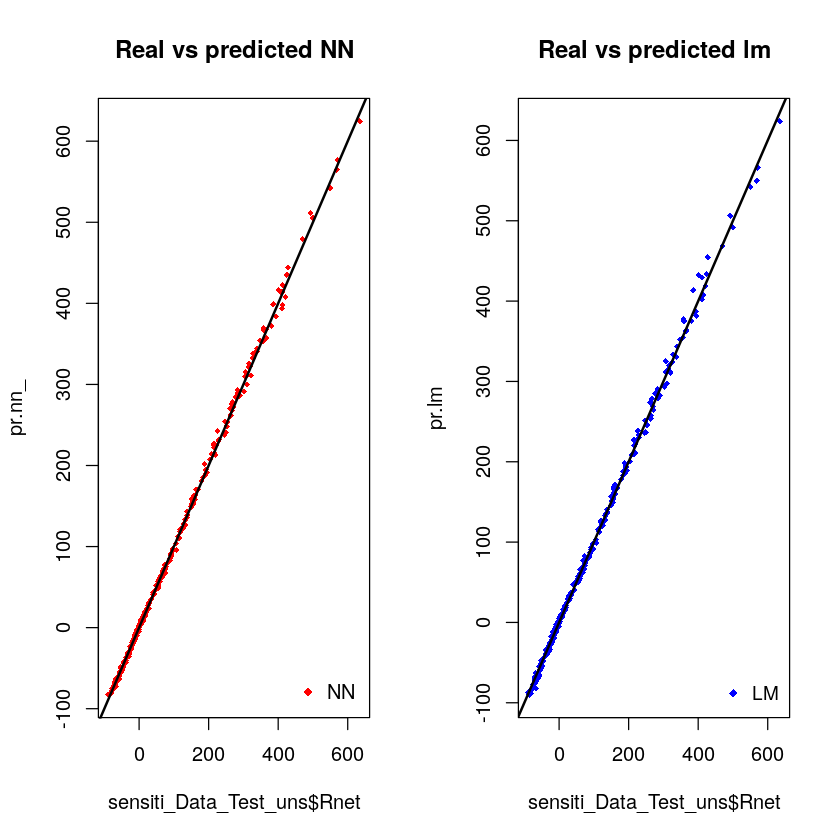

In [134]:
par(mfrow=c(1,2))
plot(sensiti_Data_Test_uns$Rnet,pr.nn_,col='red',main='Real vs predicted NN',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='NN',pch=18,col='red', bty='n')
plot(sensiti_Data_Test_uns$Rnet,pr.lm,col='blue',main='Real vs predicted lm',pch=18, cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='LM',pch=18,col='blue', bty='n', cex=.95)

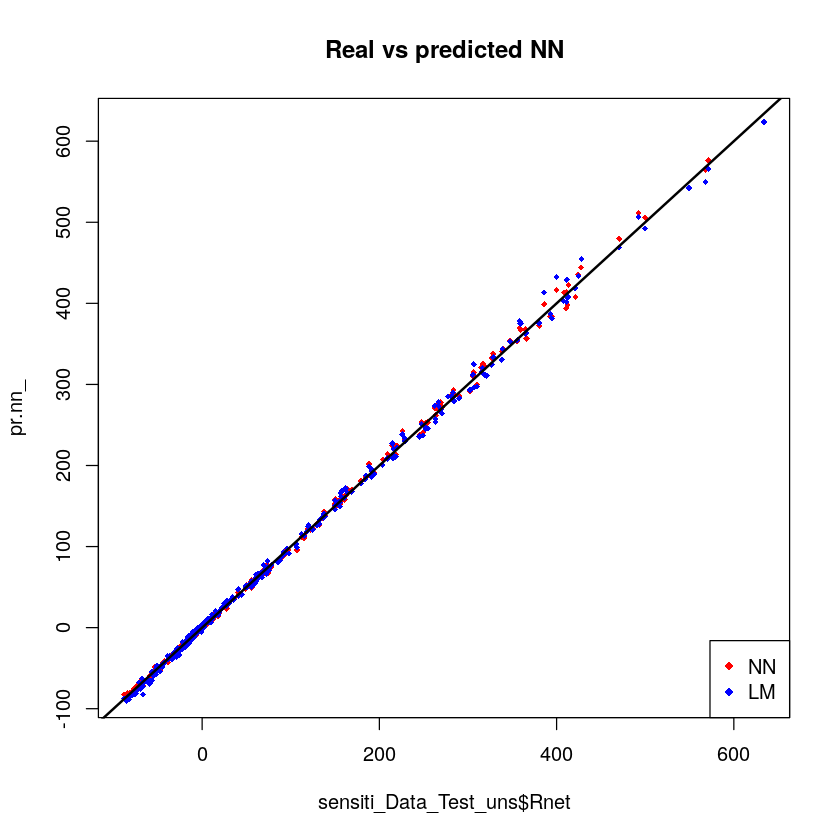

In [135]:
plot(sensiti_Data_Test_uns$Rnet,pr.nn_,col='red',main='Real vs predicted NN',pch=18,cex=0.7)
points(sensiti_Data_Test_uns$Rnet,pr.lm,col='blue',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend=c('NN','LM'),pch=18,col=c('red','blue'))

## 10 fold cross-validated MSE for the linear model:

In [137]:
library(boot)
set.seed(200)
lm.fit <- glm(Rnet~.,data = sensiti_met_data[c(3,4,5,6,7,8,9,10)])
cv.glm(sensiti_met_data[c(3,4,5,6,7,8,9,10)], lm.fit,K=10)$delta[1]

[1] 31.36319584

In [142]:
? train

In [144]:
sensiti_met_d <- sensiti_met_data[c(3,4,5,6,7,8,9,10)] # %>%  mutate_all(scale01)

# Split into test and train sets without scaling
set.seed(12345)
#size is the proportion to training
sensiti_Data_Train <- sample_frac(tbl = sensiti_met_d, replace = FALSE, size = 0.80)  
sensiti_Data_Test <- anti_join(sensiti_met_d, sensiti_Data_Train)

library(caret)
model.nnet = train(Rnet~., data=sensiti_Data_Train, method="neuralnet", preProc=c("center", "scale"))
print(model.nnet)

Joining, by = c("Rl_downwell", "AT_mbar", "Rs_downwell", "rH", "T_b_1477", "D_g_1477", "F_1_s_g_1477", "Rnet")
Warning message:
“algorithm did not converge in 1 of 1 repetition(s) within the stepmax”Warning message in is.na(weights):
“is.na() applied to non-(list or vector) of type 'NULL'”Warning message:
“predictions failed for Resample01: layer1=1, layer2=0, layer3=0 Error in nrow[w] * ncol[w] : non-numeric argument to binary operator
”Warning message:
“algorithm did not converge in 1 of 1 repetition(s) within the stepmax”Warning message in is.na(weights):
“is.na() applied to non-(list or vector) of type 'NULL'”Warning message:
“predictions failed for Resample01: layer1=3, layer2=0, layer3=0 Error in nrow[w] * ncol[w] : non-numeric argument to binary operator
”Warning message:
“algorithm did not converge in 1 of 1 repetition(s) within the stepmax”Warning message in is.na(weights):
“is.na() applied to non-(list or vector) of type 'NULL'”Warning message:
“predictions failed for Resampl

“algorithm did not converge in 1 of 1 repetition(s) within the stepmax”Warning message in is.na(weights):
“is.na() applied to non-(list or vector) of type 'NULL'”Warning message:
“predictions failed for Resample17: layer1=3, layer2=0, layer3=0 Error in nrow[w] * ncol[w] : non-numeric argument to binary operator
”Warning message:
“algorithm did not converge in 1 of 1 repetition(s) within the stepmax”Warning message in is.na(weights):
“is.na() applied to non-(list or vector) of type 'NULL'”Warning message:
“predictions failed for Resample17: layer1=5, layer2=0, layer3=0 Error in nrow[w] * ncol[w] : non-numeric argument to binary operator
”Warning message:
“algorithm did not converge in 1 of 1 repetition(s) within the stepmax”Warning message in is.na(weights):
“is.na() applied to non-(list or vector) of type 'NULL'”Warning message:
“predictions failed for Resample18: layer1=1, layer2=0, layer3=0 Error in nrow[w] * ncol[w] : non-numeric argument to binary operator
”Warning message:
“algori

”Warning message:
“algorithm did not converge in 1 of 1 repetition(s) within the stepmax”Warning message in is.na(weights):
“is.na() applied to non-(list or vector) of type 'NULL'”Warning message:
“predictions failed for Resample25: layer1=5, layer2=0, layer3=0 Error in nrow[w] * ncol[w] : non-numeric argument to binary operator
”Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Something is wrong; all the RMSE metric values are missing:
      RMSE        Rsquared        MAE     
 Min.   : NA   Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA   Max.   : NA  
 NA's   :3     NA's   :3     NA's   :3    


ERROR: Error: Stopping


In [ ]:
set.seed(450)
cv.error <- NULL
k <- 10
library(plyr) 
pbar <- create_progress_bar('text')
pbar$init(k)
for(i in 1:k){
    index <- sample(1:nrow(sensiti_met_data[c(3,4,5,6,7,8,9,10)]),round(0.9*nrow(sensiti_met_data[c(3,4,5,6,7,8,9,10)])))
    train.cv <- scaled[index,]
    test.cv <- scaled[-index,]
    nn <- neuralnet(f,data=train.cv,hidden=c(5,2),linear.output=T)   
    pr.nn <- compute(nn,test.cv[,1:13])
    pr.nn <- pr.nn$net.result*(max(sensiti_met_data$medv)-min(sensiti_met_data$medv))+min(sensiti_met_data$medv)   
    test.cv.r <- (test.cv$Rnet)*(max(sensiti_met_data$medv)-min(sensiti_met_data$medv))+min(sensiti_met_data$medv)   
    cv.error[i] <- sum((test.cv.r - pr.nn)^2)/nrow(test.cv)    
    pbar$step()
}

In [143]:
? neuralnet